- Load the dataset into a Pandas DataFrame.
- Display the first few rows.
- Get an overview of the dataset (columns, data types, missing values, etc.).

In [40]:
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
# Load the dataset
file_path = 'taxi_cleaned.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

In [42]:
# Display the first few rows
df.head()


,Unnamed: 0.1,Unnamed: 0,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,TRAJECTORY_LENGTH
0,0,0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643, 41.141412], [-8.618499, 41.141376...",23
1,1,1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847, 41.159826], [-8.640351, 41.159871...",19
2,2,2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964, 41.140359], [-8.613378, 41.14035]...",65
3,3,3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678, 41.151951], [-8.574705, 41.151942...",43
4,4,4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994, 41.18049], [-8.645949, 41.180517]...",29


In [43]:

# Get basic info about the dataset
print("\nDataset Info:")
df.info()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672092 entries, 0 to 1672091
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0.1       1672092 non-null  int64  
 1   Unnamed: 0         1672092 non-null  int64  
 2   TRIP_ID            1672092 non-null  int64  
 3   CALL_TYPE          1672092 non-null  object 
 4   ORIGIN_CALL        362590 non-null   float64
 5   ORIGIN_STAND       797419 non-null   float64
 6   TAXI_ID            1672092 non-null  int64  
 7   TIMESTAMP          1672092 non-null  int64  
 8   DAY_TYPE           1672092 non-null  object 
 9   MISSING_DATA       1672092 non-null  bool   
 10  POLYLINE           1672092 non-null  object 
 11  TRAJECTORY_LENGTH  1672092 non-null  int64  
dtypes: bool(1), float64(2), int64(6), object(3)
memory usage: 141.9+ MB


In [44]:
# Check for missing values
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


Unnamed: 0.1               0
Unnamed: 0                 0
TRIP_ID                    0
CALL_TYPE                  0
ORIGIN_CALL          1309502
ORIGIN_STAND          874673
TAXI_ID                    0
TIMESTAMP                  0
DAY_TYPE                   0
MISSING_DATA               0
POLYLINE                   0
TRAJECTORY_LENGTH          0
dtype: int64

- Drop `Unnamed: 0.1` and `Unnamed: 0` (unnecessary index columns).  
- `ORIGIN_CALL` and `ORIGIN_STAND` have significant missing values.  
- `POLYLINE` is an object but contains lists (keep as is).  
- Convert `TIMESTAMP` to datetime for better analysis.  


In [45]:
# Drop unnecessary index columns
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

# Convert TIMESTAMP to datetime format
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'], unit='s')

# Display the updated dataset info
print("\nUpdated Dataset Info:")
df.info()


Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672092 entries, 0 to 1672091
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   TRIP_ID            1672092 non-null  int64         
 1   CALL_TYPE          1672092 non-null  object        
 2   ORIGIN_CALL        362590 non-null   float64       
 3   ORIGIN_STAND       797419 non-null   float64       
 4   TAXI_ID            1672092 non-null  int64         
 5   TIMESTAMP          1672092 non-null  datetime64[ns]
 6   DAY_TYPE           1672092 non-null  object        
 7   MISSING_DATA       1672092 non-null  bool          
 8   POLYLINE           1672092 non-null  object        
 9   TRAJECTORY_LENGTH  1672092 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 116.4+ MB


In [46]:
# Display first few rows after modifications
print("\nUpdated Dataset Preview:")
df.head()



Updated Dataset Preview:


,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,TRAJECTORY_LENGTH
0,1372636858620000589,C,NaN,NaN,20000589,2013-07-01 00:00:58,A,False,"[[-8.618643, 41.141412], [-8.618499, 41.141376...",23
1,1372637303620000596,B,NaN,7.0,20000596,2013-07-01 00:08:23,A,False,"[[-8.639847, 41.159826], [-8.640351, 41.159871...",19
2,1372636951620000320,C,NaN,NaN,20000320,2013-07-01 00:02:31,A,False,"[[-8.612964, 41.140359], [-8.613378, 41.14035]...",65
3,1372636854620000520,C,NaN,NaN,20000520,2013-07-01 00:00:54,A,False,"[[-8.574678, 41.151951], [-8.574705, 41.151942...",43
4,1372637091620000337,C,NaN,NaN,20000337,2013-07-01 00:04:51,A,False,"[[-8.645994, 41.18049], [-8.645949, 41.180517]...",29


- `ORIGIN_CALL` (~78% missing) -> Drop it.  
- `ORIGIN_STAND` (~52% missing) -> Fill NaNs with `0` (assuming it means no stand).  



In [47]:
# Drop ORIGIN_CALL column due to excessive missing values
df.drop(columns=['ORIGIN_CALL'], inplace=True)

# Fill ORIGIN_STAND NaN values with 0
df['ORIGIN_STAND'].fillna(0, inplace=True)

# Verify changes
print("\nUpdated Missing Values Count:")
df.isnull().sum()





Updated Missing Values Count:


TRIP_ID              0
CALL_TYPE            0
ORIGIN_STAND         0
TAXI_ID              0
TIMESTAMP            0
DAY_TYPE             0
MISSING_DATA         0
POLYLINE             0
TRAJECTORY_LENGTH    0
dtype: int64

In [48]:
# Display dataset info after modifications
print("\nDataset Info After Handling Missing Values:")
df.info()


Dataset Info After Handling Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672092 entries, 0 to 1672091
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   TRIP_ID            1672092 non-null  int64         
 1   CALL_TYPE          1672092 non-null  object        
 2   ORIGIN_STAND       1672092 non-null  float64       
 3   TAXI_ID            1672092 non-null  int64         
 4   TIMESTAMP          1672092 non-null  datetime64[ns]
 5   DAY_TYPE           1672092 non-null  object        
 6   MISSING_DATA       1672092 non-null  bool          
 7   POLYLINE           1672092 non-null  object        
 8   TRAJECTORY_LENGTH  1672092 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 103.7+ MB


In [49]:
# Display first few rows to confirm changes
print("\nUpdated Dataset Preview:")
df.head()


Updated Dataset Preview:


,TRIP_ID,CALL_TYPE,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,TRAJECTORY_LENGTH
0,1372636858620000589,C,0.0,20000589,2013-07-01 00:00:58,A,False,"[[-8.618643, 41.141412], [-8.618499, 41.141376...",23
1,1372637303620000596,B,7.0,20000596,2013-07-01 00:08:23,A,False,"[[-8.639847, 41.159826], [-8.640351, 41.159871...",19
2,1372636951620000320,C,0.0,20000320,2013-07-01 00:02:31,A,False,"[[-8.612964, 41.140359], [-8.613378, 41.14035]...",65
3,1372636854620000520,C,0.0,20000520,2013-07-01 00:00:54,A,False,"[[-8.574678, 41.151951], [-8.574705, 41.151942...",43
4,1372637091620000337,C,0.0,20000337,2013-07-01 00:04:51,A,False,"[[-8.645994, 41.18049], [-8.645949, 41.180517]...",29


- Extract `hour`, `day of the week`, and `month` from `TIMESTAMP` for trend analysis.  
- Plot trip frequency by hour to identify peak demand times.  


C:\Users\Mohammad\AppData\Local\Temp\ipykernel_6192\4199309074.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_trips.index, y=hourly_trips.values, palette="viridis")


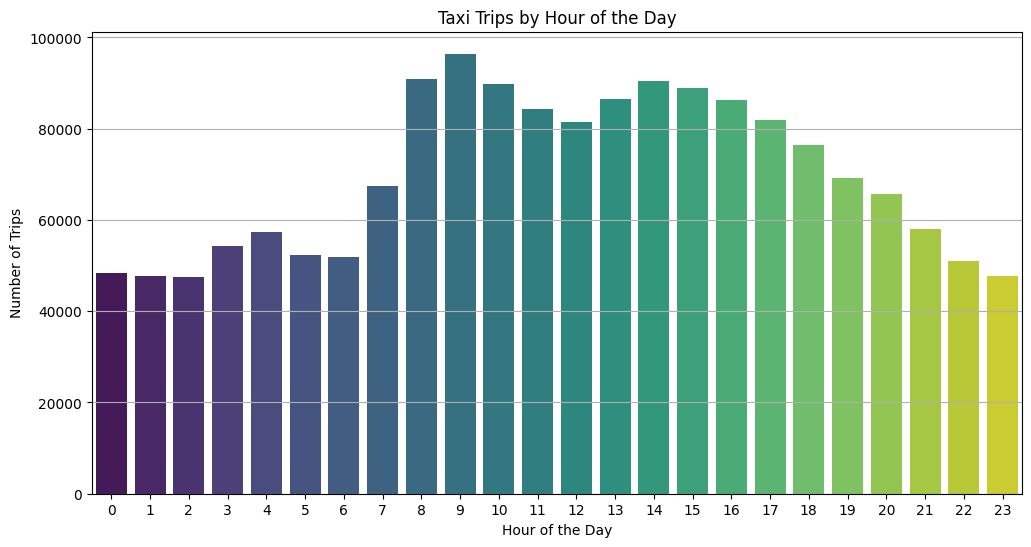

In [51]:
# Extract date-related features
df['HOUR'] = df['TIMESTAMP'].dt.hour
df['DAY_OF_WEEK'] = df['TIMESTAMP'].dt.dayofweek  # Monday = 0, Sunday = 6
df['MONTH'] = df['TIMESTAMP'].dt.month

# Count trips per hour
hourly_trips = df['HOUR'].value_counts().sort_index()

# Plot trip frequency by hour
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_trips.index, y=hourly_trips.values, palette="viridis")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Taxi Trips by Hour of the Day")
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()


- **Morning & Evening Peaks:**  
  - Surge in trips from **8-10 AM** (morning commute).  
  - Another peak from **4-6 PM** (evening rush).  

- **Nighttime Drop:**  
  - Significant decline after **9 PM**, staying low until early morning.  

- **Steady Midday Usage:**  
  - Consistent trip volume between **10 AM - 4 PM**.  

- Next: Analyze trip patterns across weekdays vs. weekends.  

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_6192\1093820536.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_labels, y=day_of_week_trips.values, palette="viridis")


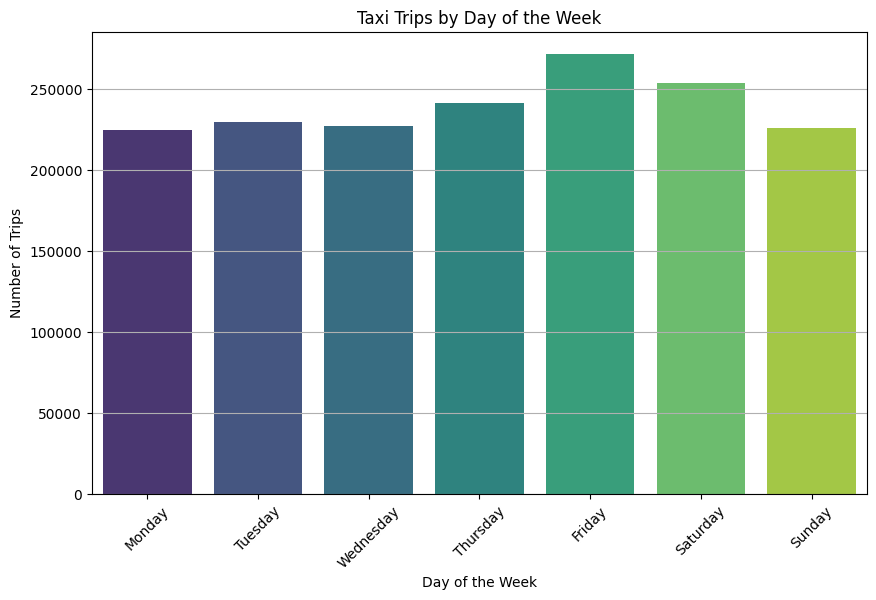

In [52]:
# Count trips by day of the week
day_of_week_trips = df['DAY_OF_WEEK'].value_counts().sort_index()

# Day mapping for better labels
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
day_labels = [day_mapping[day] for day in day_of_week_trips.index]

# Plot trip frequency by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=day_labels, y=day_of_week_trips.values, palette="viridis")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trips")
plt.title("Taxi Trips by Day of the Week")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


- Friday and Saturday have the highest demand, likely due to nightlife and weekend activities.  
- Monday to Thursday show steady trip volumes, typical of workweek commutes.  
- Sunday sees a slight drop, may be a rest day for many people, or possibly due to reduced travel demand.  

Next:
- Plot a histogram of `TRAJECTORY_LENGTH` to observe its distribution.  
- Identify potential outliers or unusual trends.  



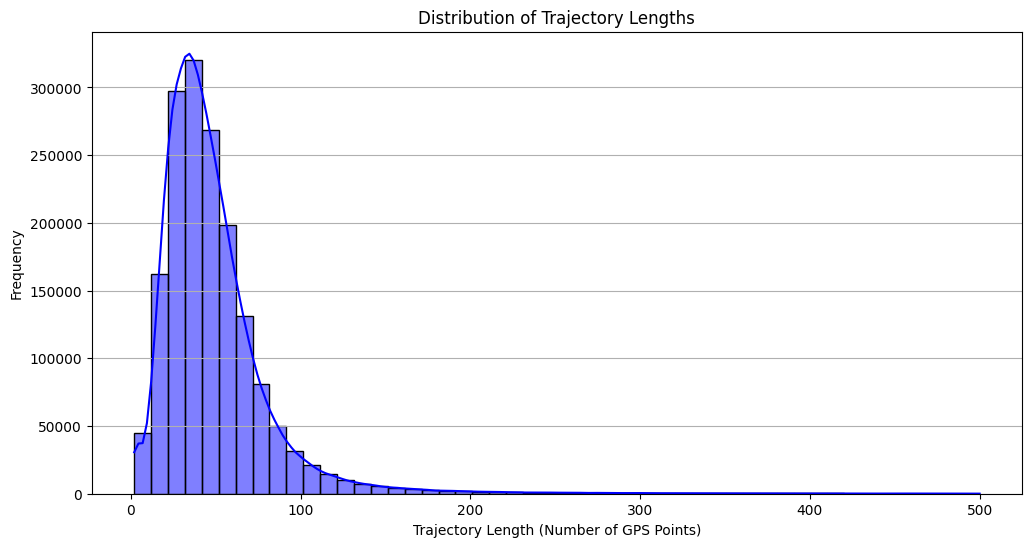

In [53]:
# Plot the distribution of TRAJECTORY_LENGTH
plt.figure(figsize=(12, 6))
sns.histplot(df['TRAJECTORY_LENGTH'], bins=50, kde=True, color="blue")
plt.xlabel("Trajectory Length (Number of GPS Points)")
plt.ylabel("Frequency")
plt.title("Distribution of Trajectory Lengths")
plt.grid(axis='y')
plt.show()


- Most trips are short, with a high frequency under **100 GPS points**.  
- A long tail exists, indicating some long-distance trips.  
- Potential outliers: trips above **300 GPS points** may be long-distance or erroneous.  
- Typical trip lengths fall between **20-100 GPS points**.  


Next:
- Get summary stats for `TRAJECTORY_LENGTH` to see typical trip lengths.  
- Use the IQR method to spot and summarize any unusually long trips.  


In [56]:
# Compute descriptive statistics
trajectory_stats = df['TRAJECTORY_LENGTH'].describe()
print("\nTrajectory Length Statistics:")
print(trajectory_stats)

# Define IQR for outlier detection
Q1 = trajectory_stats['25%']
Q3 = trajectory_stats['75%']
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nOutlier Thresholds: Lower = {lower_bound}, Upper = {upper_bound}")

# Count outliers
outliers = df[(df['TRAJECTORY_LENGTH'] < lower_bound) | (df['TRAJECTORY_LENGTH'] > upper_bound)]
print(f"\nNumber of Outliers: {len(outliers)}")

# Display sample of outliers
print("\nSample Outliers:")
outliers.head()



Trajectory Length Statistics:
count    1.672092e+06
mean     4.888127e+01
std      3.475503e+01
min      2.000000e+00
25%      2.900000e+01
50%      4.200000e+01
75%      5.900000e+01
max      5.000000e+02
Name: TRAJECTORY_LENGTH, dtype: float64

Outlier Thresholds: Lower = -16.0, Upper = 104.0

Number of Outliers: 79056

Sample Outliers:


,TRIP_ID,CALL_TYPE,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,TRAJECTORY_LENGTH,HOUR,DAY_OF_WEEK,MONTH
45,1372639536620000570,A,0.0,20000570,2013-07-01 00:45:36,A,False,"[[-8.663409, 41.180724], [-8.665209, 41.18112]...",145,0,0,7
72,1372638303620000112,A,0.0,20000112,2013-07-01 00:25:03,A,False,"[[-8.587116, 41.162427], [-8.586198, 41.162112...",116,0,0,7
85,1372637754620000007,C,0.0,20000007,2013-07-01 00:15:54,A,False,"[[-8.645373, 41.008275], [-8.645427, 41.00886]...",105,0,0,7
92,1372644253620000574,C,0.0,20000574,2013-07-01 02:04:13,A,False,"[[-8.640792, 41.149026], [-8.640126, 41.146227...",141,2,0,7
101,1372638616620000672,C,0.0,20000672,2013-07-01 00:30:16,A,False,"[[-8.67411, 41.153868], [-8.674119, 41.153841]...",112,0,0,7


- **Outlier Thresholds:** Anything above **104 GPS points** is an outlier (no lower outliers).  
- **Outlier Count:** **79,056 trips** (~4.7% of the data) exceed this threshold.  
- **Nature of Outliers:** These are extra-long trips, but some might be data errors.  

We have two options:
- **Option 1: Cap Lengths** -> Keep all data but limit extreme values.  
- **Option 2: Remove Outliers** -> Get a cleaner dataset, reducing noise.  

Went with: Remove Outliers  
- **Better Model Accuracy:** Prevents extreme trips from skewing predictions.  
- **Cleaner Data:** Focuses on typical taxi trips, improving reliability.  
- **Easier Analysis:** Makes trends clearer and models simpler to train.  

Next Steps  
- Drop all trips where `TRAJECTORY_LENGTH` is over **104 GPS points**.  



In [57]:
# Remove outliers
cleaned_df = df[df['TRAJECTORY_LENGTH'] <= 104]

# Check the shape of the dataset after removal
print(f"Original Dataset Size: {df.shape[0]}")
print(f"Cleaned Dataset Size: {cleaned_df.shape[0]}")
print(f"Number of Rows Removed: {df.shape[0] - cleaned_df.shape[0]}")

# Display descriptive statistics of TRAJECTORY_LENGTH after removal
print("\nTrajectory Length Statistics (After Outlier Removal):")
print(cleaned_df['TRAJECTORY_LENGTH'].describe())


Original Dataset Size: 1672092
Cleaned Dataset Size: 1593036
Number of Rows Removed: 79056

Trajectory Length Statistics (After Outlier Removal):
count    1.593036e+06
mean     4.348283e+01
std      2.060735e+01
min      2.000000e+00
25%      2.800000e+01
50%      4.100000e+01
75%      5.600000e+01
max      1.040000e+02
Name: TRAJECTORY_LENGTH, dtype: float64


- **Dataset Reduction:** Now **1,593,036 rows**.  
- **Updated Stats:**  
  - Mean trajectory length: **43.48 GPS points** (was 48.88).  
  - Standard deviation: **20.61** (less spread out).  
  - Max length: **104 GPS points** (the set cap).  

- `CALL_TYPE` and `DAY_TYPE` are now numeric (`int8`), making the dataset ready for machine learning.  
- Dropped `POLYLINE` and `TRIP_ID` to keep things streamlined.  
- Dataset has **10 features**, no missing values, and is memory-efficient.



- Convert `CALL_TYPE` and `DAY_TYPE` into numbers for modeling.  
- Drop `POLYLINE` (not needed for this analysis) and `TRIP_ID` (just an identifier).  


In [96]:
cleaned_df = cleaned_df.copy()

# Encode categorical variables
cleaned_df['CALL_TYPE'] = cleaned_df['CALL_TYPE'].astype('category').cat.codes
cleaned_df['DAY_TYPE'] = cleaned_df['DAY_TYPE'].astype('category').cat.codes

# Drop unnecessary columns
model_df = cleaned_df.drop(columns=['POLYLINE', 'TRIP_ID'])

# Display the prepared dataset info
print("\nPrepared Dataset Info:")
print(model_df.info())

# Display a sample of the prepared dataset
print("\nSample Rows:")
model_df.head()



Prepared Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1593036 entries, 0 to 1672091
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   CALL_TYPE          1593036 non-null  int8          
 1   ORIGIN_STAND       1593036 non-null  float64       
 2   TAXI_ID            1593036 non-null  int64         
 3   TIMESTAMP          1593036 non-null  datetime64[ns]
 4   DAY_TYPE           1593036 non-null  int8          
 5   MISSING_DATA       1593036 non-null  bool          
 6   TRAJECTORY_LENGTH  1593036 non-null  int64         
 7   HOUR               1593036 non-null  int32         
 8   DAY_OF_WEEK        1593036 non-null  object        
 9   MONTH              1593036 non-null  int32         
dtypes: bool(1), datetime64[ns](1), float64(1), int32(2), int64(2), int8(2), object(1)
memory usage: 89.6+ MB
None

Sample Rows:


,CALL_TYPE,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,TRAJECTORY_LENGTH,HOUR,DAY_OF_WEEK,MONTH
0,2,0.0,20000589,2013-07-01 00:00:58,0,False,23,0,Monday,7
1,1,7.0,20000596,2013-07-01 00:08:23,0,False,19,0,Monday,7
2,2,0.0,20000320,2013-07-01 00:02:31,0,False,65,0,Monday,7
3,2,0.0,20000520,2013-07-01 00:00:54,0,False,43,0,Monday,7
4,2,0.0,20000337,2013-07-01 00:04:51,0,False,29,0,Monday,7


In [97]:
# Drop TIMESTAMP (it's redundant after extracting HOUR, DAY_OF_WEEK, etc.)
model_df = model_df.drop(columns=['TIMESTAMP'])

# Encode DAY_OF_WEEK into numeric values
day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 
               'Friday': 4, 'Saturday': 5, 'Sunday': 6}
model_df['DAY_OF_WEEK'] = model_df['DAY_OF_WEEK'].map(day_mapping)

# Optionally drop MISSING_DATA (since all rows are filtered as False)
model_df = model_df.drop(columns=['MISSING_DATA'])

# Display updated dataset info
print("\nUpdated Dataset Info:")
print(model_df.info())

# Display a sample of the finalized dataset
print("\nSample Rows:")
model_df.head()



Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1593036 entries, 0 to 1672091
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   CALL_TYPE          1593036 non-null  int8   
 1   ORIGIN_STAND       1593036 non-null  float64
 2   TAXI_ID            1593036 non-null  int64  
 3   DAY_TYPE           1593036 non-null  int8   
 4   TRAJECTORY_LENGTH  1593036 non-null  int64  
 5   HOUR               1593036 non-null  int32  
 6   DAY_OF_WEEK        1593036 non-null  int64  
 7   MONTH              1593036 non-null  int32  
dtypes: float64(1), int32(2), int64(3), int8(2)
memory usage: 76.0 MB
None

Sample Rows:


,CALL_TYPE,ORIGIN_STAND,TAXI_ID,DAY_TYPE,TRAJECTORY_LENGTH,HOUR,DAY_OF_WEEK,MONTH
0,2,0.0,20000589,0,23,0,0,7
1,1,7.0,20000596,0,19,0,0,7
2,2,0.0,20000320,0,65,0,0,7
3,2,0.0,20000520,0,43,0,0,7
4,2,0.0,20000337,0,29,0,0,7


In [113]:
# Shuffle the rows randomly and display the first few rows
shuffled_test_df = model_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the first few rows of the shuffled DataFrame
print("\nSample Rows (Randomized for Testing):")
random_sample_df.head()


Sample Rows (Randomized for Testing):


,CALL_TYPE,ORIGIN_STAND,TAXI_ID,DAY_TYPE,TRAJECTORY_LENGTH,HOUR,DAY_OF_WEEK,MONTH
0,1,25.0,20000612,0,38,23,0,9
1,2,0.0,20000658,0,29,16,5,12
2,1,6.0,20000333,0,47,10,6,5
3,2,0.0,20000621,0,52,15,1,7
4,0,0.0,20000151,0,75,16,2,5


In [114]:
# Save the original (non-shuffled) cleaned dataset to a CSV file
model_df.to_csv('cleaned_taxi_data.csv', index=False)

# Confirm the file was saved
print("\nCleaned dataset saved as 'cleaned_taxi_data.csv'.")



Cleaned dataset saved as 'cleaned_taxi_data.csv'.


## Next Steps for the Team

In [116]:
import pandas as pd

# Load the cleaned dataset
file_path = 'cleaned_taxi_data.csv' 
df = pd.read_csv(file_path)
